---
# Imports

In [1]:
# current filepath system leaves plenty to be desired
import sys
local_path = '/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/'
sys.path.insert(0, local_path)

# imports.py in /utils/
from utils.imports import *

# plotting magic
%matplotlib inline
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)
# plt.style.available
# ^^^ show available seaborn styles

# !!! Warning !!! 
# *** no more warnings ***
# import warnings
# warnings.filterwarnings("ignore")

# custom mods
# from utils.tidy import *
# from utils.model import *


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


---
# gorcery_db

## *Acquire*

In [2]:
# # first run
# url=get_db_url('grocery_db')
# df = pd.read_sql('SELECT * FROM grocery_customers', url)
# df.to_csv('/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/csv/grocery_db.csv',index=False)
# cached
df = pd.read_csv('/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/csv/grocery_db.csv')

## *Prepare*

In [3]:
# df=df.drop('customer_id',axis=1)
df=df.astype("float32", copy = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       440 non-null    float32
 1   Channel           440 non-null    float32
 2   Region            440 non-null    float32
 3   Fresh             440 non-null    float32
 4   Milk              440 non-null    float32
 5   Grocery           440 non-null    float32
 6   Frozen            440 non-null    float32
 7   Detergents_Paper  440 non-null    float32
 8   Delicassen        440 non-null    float32
dtypes: float32(9)
memory usage: 15.6 KB


In [5]:
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,1.0,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2.0,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,3.0,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,4.0,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [6]:
# df.Grocery.plot.box()

In [7]:
# sns.scatterplot(df.Grocery, df.Fresh, df.Frozen)
# plt.show()


In [8]:
# cols=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
cols = df.columns

cols

Index(['customer_id', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [9]:
df = StandardScaler().fit_transform(df)

In [10]:
df=pd.DataFrame(df, columns=cols)

In [11]:
dbsc = DBSCAN(eps = .75, min_samples = 15).fit(df)

In [12]:
df['labels'] = dbsc.labels_
df.labels.value_counts()

-1    300
 0     67
 2     46
 1     27
Name: labels, dtype: int64

In [13]:
omg=pd.melt(df,id_vars=['labels'],value_vars=cols)

In [14]:
omg.head()

,labels,variable,value
0,-1,customer_id,-1.728119
1,-1,customer_id,-1.720246
2,-1,customer_id,-1.712373
3,-1,customer_id,-1.704500
4,-1,customer_id,-1.696627


## *Clusters*

It looks like the clustering algo tried to primarily sort by region because each category has only one region.

<AxesSubplot:xlabel='variable', ylabel='value'>

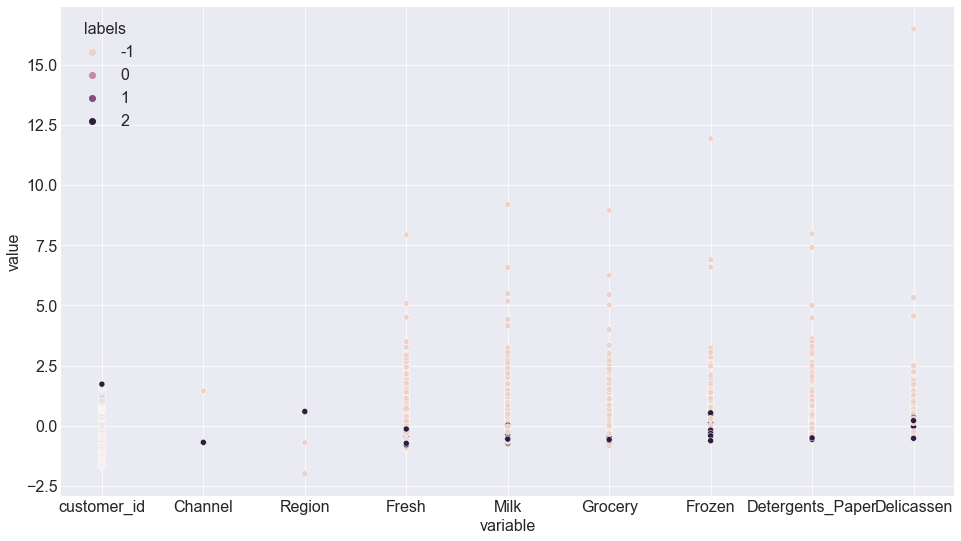

In [15]:
sns.scatterplot(data=omg, x='variable',y='value', hue='labels')

<AxesSubplot:xlabel='variable', ylabel='value'>

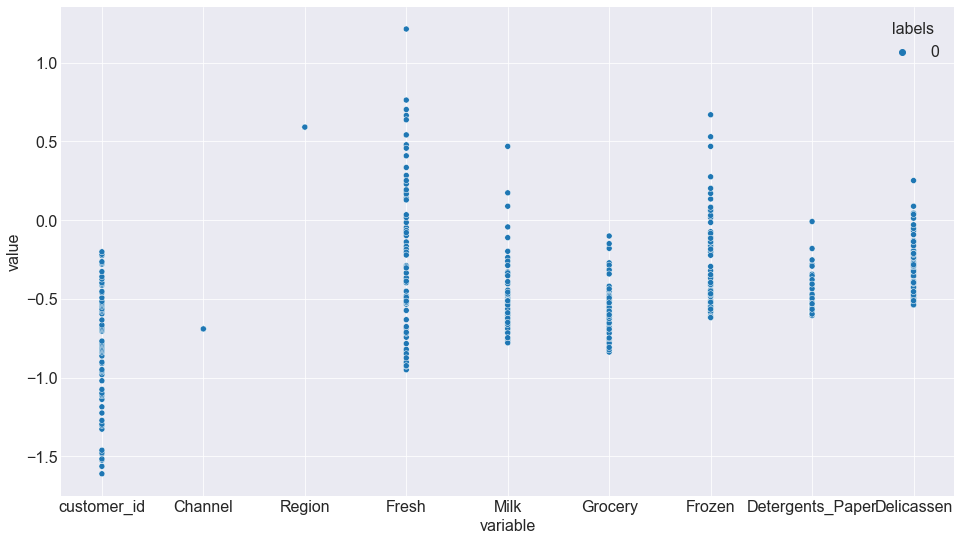

In [16]:
sns.scatterplot(data=omg[omg.labels==0], x='variable',y='value', hue='labels')

<AxesSubplot:xlabel='variable', ylabel='value'>

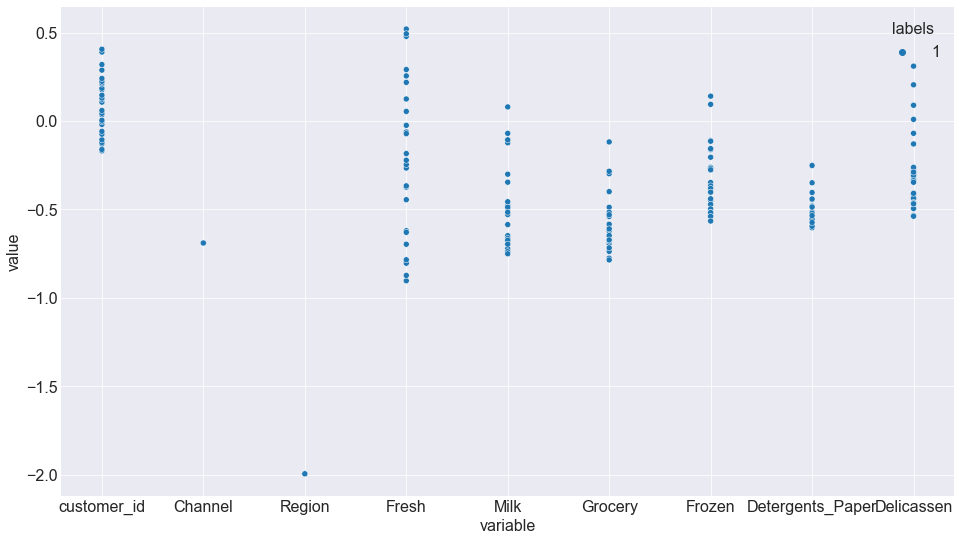

In [17]:
sns.scatterplot(data=omg[omg.labels==1], x='variable',y='value', hue='labels')

<AxesSubplot:xlabel='variable', ylabel='value'>

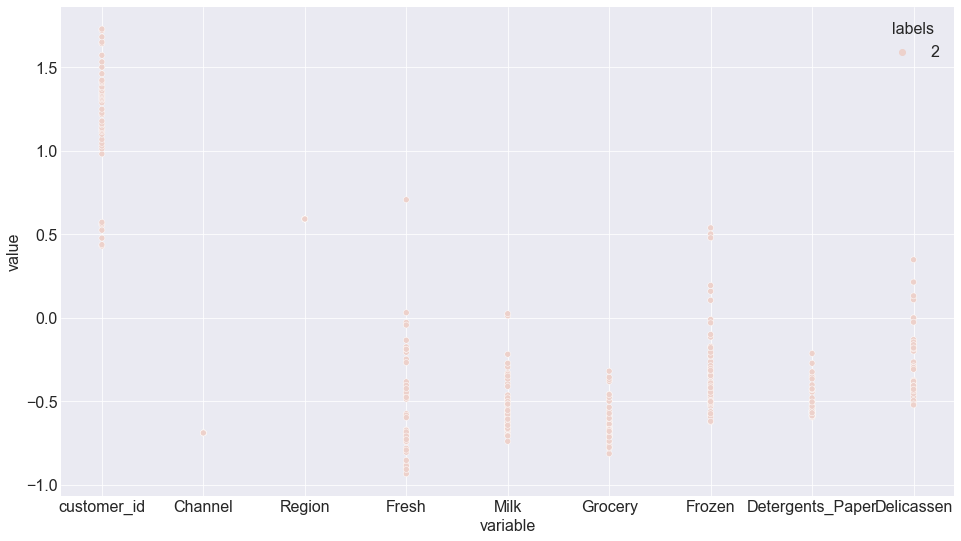

In [18]:
sns.scatterplot(data=omg[omg.labels==2], x='variable',y='value', hue='labels')

---
# curriculum_logs

## *Acquire*

In [19]:
# # first run
# url=get_db_url('curriculum_logs')
# df = pd.read_sql('''
# 	SELECT *
# 	FROM logs
# 	LEFT JOIN cohorts 
# 	ON logs.cohort_id=cohorts.id
# 	;''', url)
# df.to_csv('/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/csv/curriculum_logs.csv',index=False)

# cached
df = pd.read_csv('/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/csv/curriculum_logs.csv')

In [20]:
df.head()


,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


## *Explore*

Takeaways:
- 97.105.19.58 : probably codeup wifi

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       float64
 14  program_id  847330 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 103.0+ MB


In [22]:
df[df.cohort_id!=0].groupby('ip').count().sort_values('user_id',ascending=False).head()

,date,time,path,user_id,cohort_id,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
ip,,,,,,,,,,,,,,
97.105.19.58,284579,284579,284579,284579,268648,268648,268648,268648,268648,268648,268648,268648,0,268648
97.105.19.61,61662,61662,61662,61662,60530,60530,60530,60530,60530,60530,60530,60530,0,60530
192.171.117.210,9515,9515,9515,9515,9124,9124,9124,9124,9124,9124,9124,9124,0,9124
71.150.217.33,6791,6791,6791,6791,6791,6791,6791,6791,6791,6791,6791,6791,0,6791
76.185.145.231,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,0,4754


In [23]:
(df.cohort_id==0).sum()

0

In [24]:
curc=df[['date','time','path','user_id','ip']]

In [ ]:
curc.info()